In [20]:
#!pip install -r requirements.txt


### Librerias

In [21]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from fredapi import Fred
from datetime import datetime

In [22]:
from Analysis.utils import EDA_comparison, FredIndicatorFetcher,HistoricalDataDownloader
import pandas as pd
from Analysis.utils import EDA_comparison
from Analysis.utils import HistoricalDataDownloader as HDD


In [23]:
sp500_data = pd.read_excel('data/sp500_data.xlsx')
economic_indicators_data = pd.read_excel('data/economic_indicators_data.xlsx')

In [24]:
# Configurar estilos de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [25]:
HDD_sp500 = HDD(
    tickers=['^GSPC'],
    start_date="2000-01-01")
HDD_sp500.download_data()
HDD_sp500.save_data(filepath="Data/sp500_data.xlsx")

indicators_columns=['CLI','BCI','GDP','CCI']

[*********************100%%**********************]  1 of 1 completed

Data saved to Data/sp500_data.xlsx


In [26]:
economic_indicators_data = pd.read_excel("Data/economic_indicators_data.xlsx")
sp500_data = pd.read_excel("Data/sp500_data.xlsx")


In [27]:
EDA_comparison_economic_indicators_sp500 = EDA_comparison(
    sp500_data=sp500_data,
    economic_indicators_data=economic_indicators_data
)

In [28]:
merged_data = EDA_comparison_economic_indicators_sp500.merged_data

## Comparaciones

## BASE 100

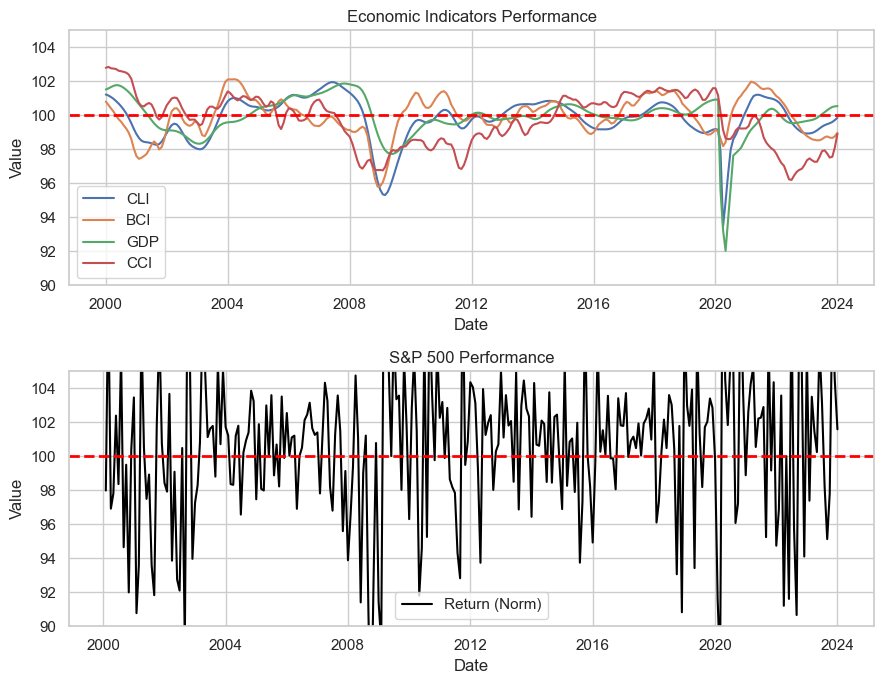

In [29]:
EDA_comparison_economic_indicators_sp500.plot_performance(sp500_column='Return (Norm)', indicators_columns=indicators_columns)

## MM3

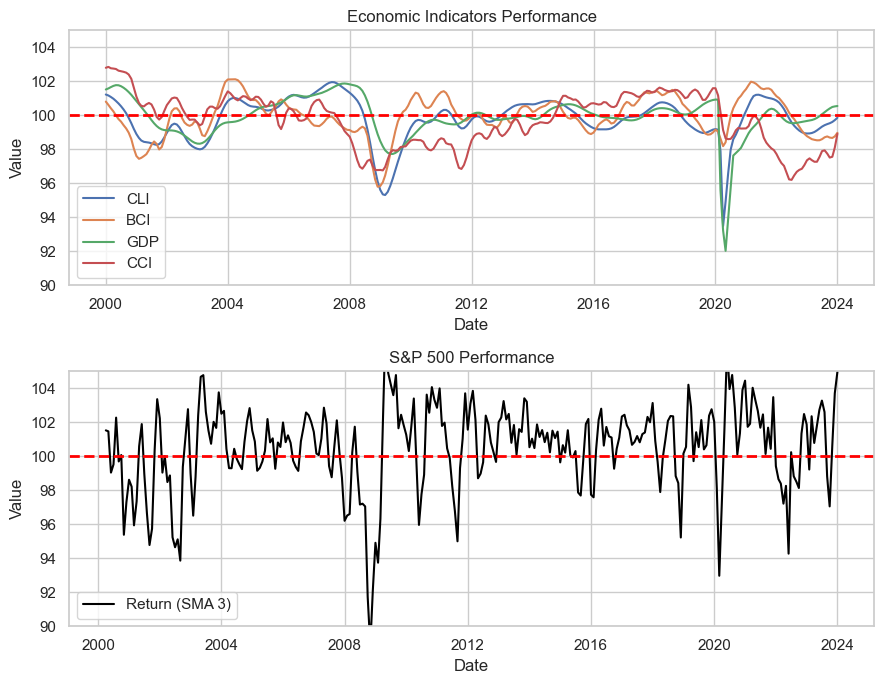

In [30]:
EDA_comparison_economic_indicators_sp500.plot_performance(sp500_column='Return (SMA 3)', indicators_columns=indicators_columns)

## MM 6

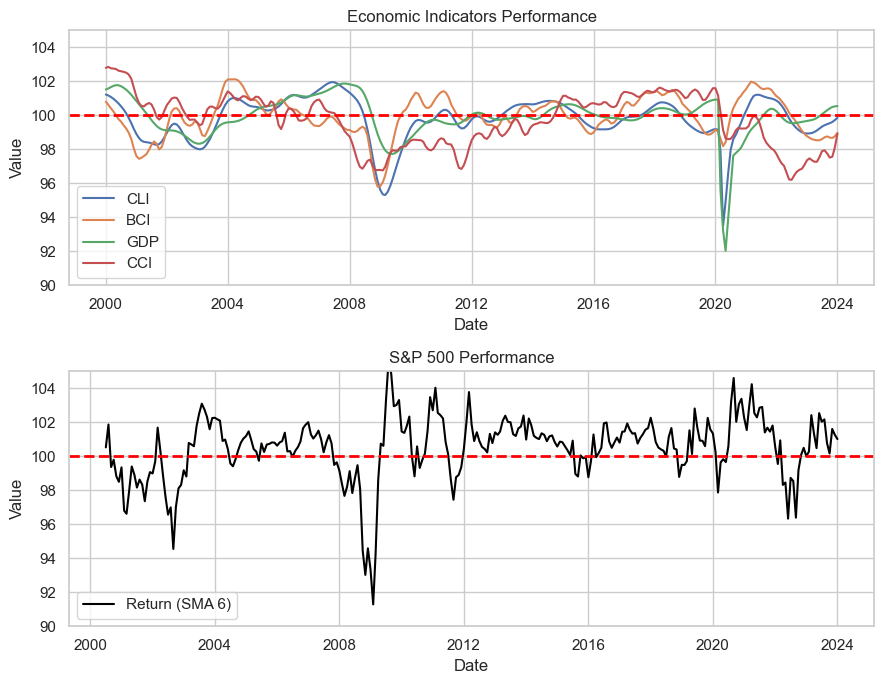

In [31]:
EDA_comparison_economic_indicators_sp500.plot_performance(sp500_column='Return (SMA 6)', indicators_columns=indicators_columns)

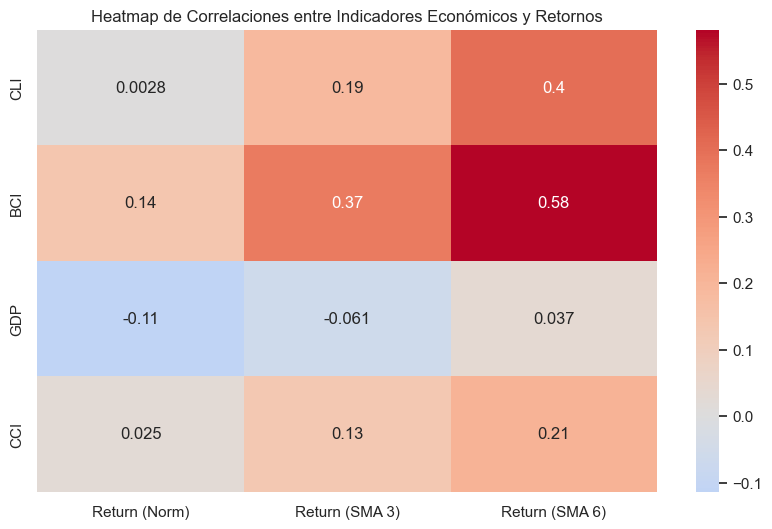

In [32]:
# Seleccionar las columnas económicas y de retornos
economic_indicators = merged_data[['CLI', 'BCI', 'GDP', 'CCI']]
returns_columns = merged_data[['Return (Norm)', 'Return (SMA 3)', 'Return (SMA 6)']]

# Calcular la correlación cruzada entre las columnas económicas y los retornos
correlation_matrix = pd.concat([economic_indicators, returns_columns], axis=1).corr()

# Extraer solo las correlaciones entre las columnas de interés
correlations = correlation_matrix.loc[economic_indicators.columns, returns_columns.columns]

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)

# Títulos y etiquetas
plt.title('Heatmap de Correlaciones entre Indicadores Económicos y Retornos')
plt.show()

***
### Otra estrategia

Toparemos los valores que se muevan respecto a una desviacion estandar de 3 puntos en los indicadores

In [33]:
for a in ['CLI', 'BCI', 'GDP', 'CCI']:
    merged_data[a] = np.where(merged_data[a]<97,97,merged_data[a])
    merged_data[a] = np.where(merged_data[a]>103,103,merged_data[a])

EDA_comparison_economic_indicators_sp500.merged_data

,^GSPC CLOSE,Return,CLI,BCI,GDP,CCI,Return (Norm),Return (SMA 3),Return (SMA 6)
Date,,,,,,,,,
2000-01-01,1394.459961,NaN,101.22350,100.80530,101.5195,102.79630,NaN,NaN,NaN
2000-02-01,1366.420044,-0.020108,101.16580,100.61020,101.5818,102.84890,97.989192,NaN,NaN
2000-03-01,1498.579956,0.096720,101.08020,100.41700,101.6581,102.76850,109.671983,NaN,NaN
2000-04-01,1452.430054,-0.030796,100.97460,100.22720,101.7313,102.75010,96.920424,101.527200,NaN
2000-05-01,1420.599976,-0.021915,100.84420,99.99604,101.7747,102.72490,97.808495,101.466967,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-01,4288.049805,-0.048719,99.48235,98.75687,100.3023,97.74630,95.128063,98.823439,100.775922
2023-10-01,4193.799805,-0.021980,99.53435,98.68998,100.4033,97.51254,97.802031,97.052818,100.165555
2023-11-01,4567.799805,0.089179,99.60859,98.66783,100.4912,97.56221,108.917927,100.616007,101.610504


*** 


## BASE 100

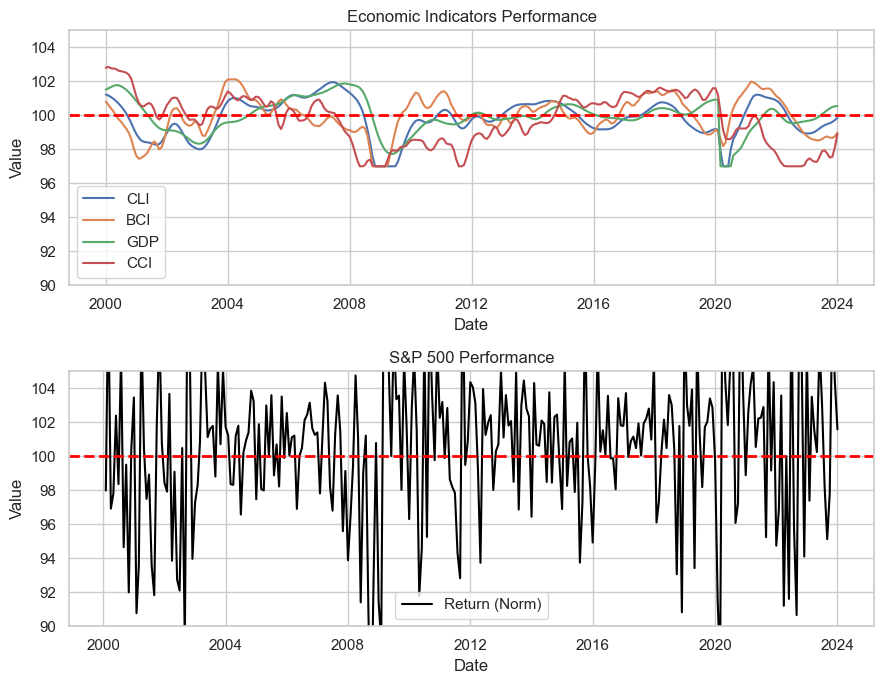

In [34]:
EDA_comparison_economic_indicators_sp500.plot_performance(sp500_column='Return (Norm)', indicators_columns=indicators_columns)

## MM 3

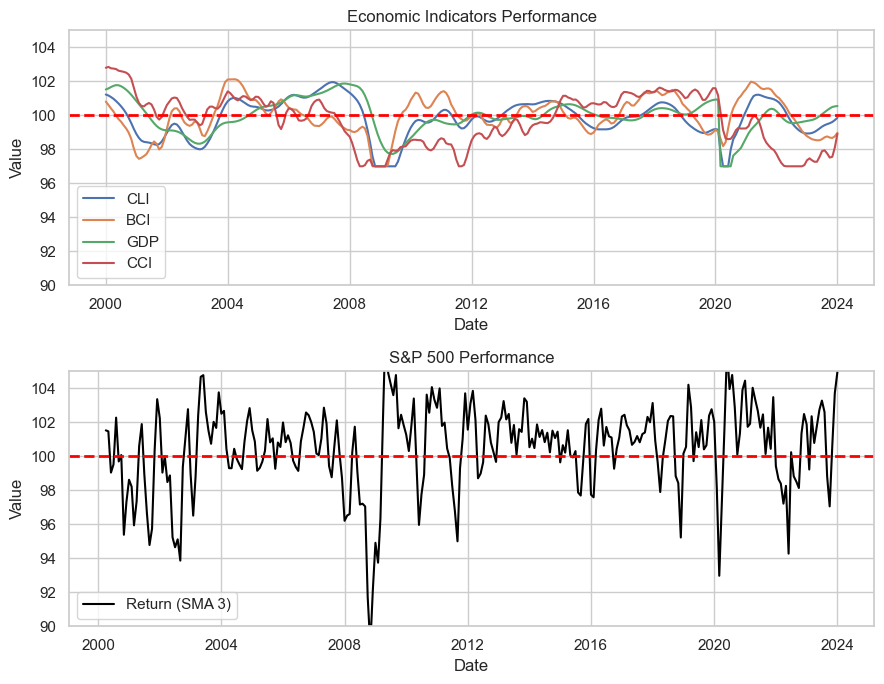

In [35]:
EDA_comparison_economic_indicators_sp500.plot_performance(sp500_column='Return (SMA 3)', indicators_columns=indicators_columns)

## MM 6

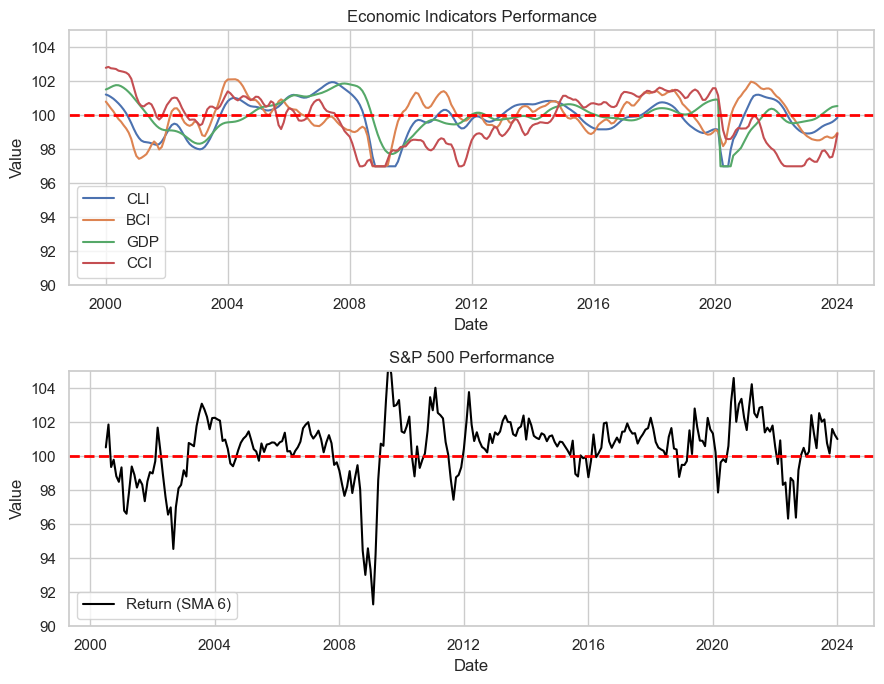

In [36]:
EDA_comparison_economic_indicators_sp500.plot_performance(sp500_column='Return (SMA 6)', indicators_columns=indicators_columns)

## Correlaciones

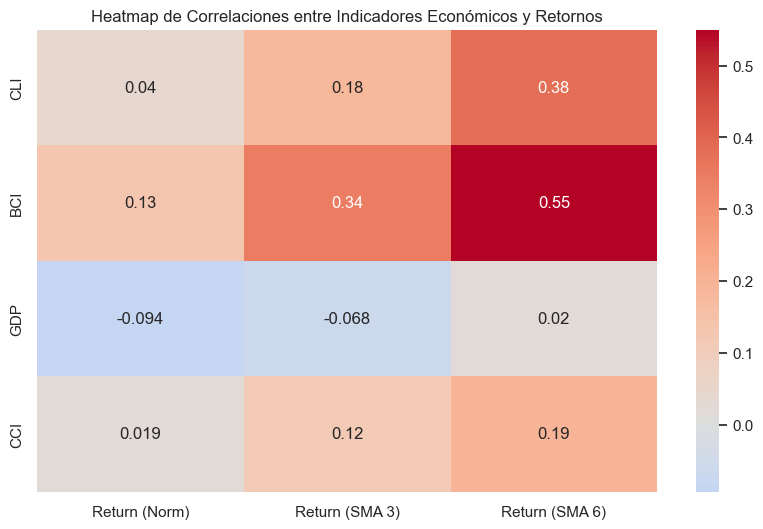

In [37]:
# Seleccionar las columnas económicas y de retornos
economic_indicators = merged_data[['CLI', 'BCI', 'GDP', 'CCI']]
returns_columns = merged_data[['Return (Norm)', 'Return (SMA 3)', 'Return (SMA 6)']]

# Calcular la correlación cruzada entre las columnas económicas y los retornos
correlation_matrix = pd.concat([economic_indicators, returns_columns], axis=1).corr()

# Extraer solo las correlaciones entre las columnas de interés
correlations = correlation_matrix.loc[economic_indicators.columns, returns_columns.columns]

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)

# Títulos y etiquetas
plt.title('Heatmap de Correlaciones entre Indicadores Económicos y Retornos')
plt.show()
